# SegFormer3D 4 MSLesSeg

**Authors**: [Andrew Darnall](https://www.linkedin.com/in/andrew-darnall-a978171ab/) and [Giovanni Spadaro](https://giovannispadaro.it/)<br>
**Release date**: 2025/--/--<br>
**Description**: Prepare dataset based on [BraTS 2021](https://www.kaggle.com/datasets/dschettler8845/brats-2021-task1).

---

## MSLesSeg Dataset Overview

---

*The **Brain MRI** scans utilized in this notebook were obtained from multiple hospitals located in the city of **Catania**, **Sicily**, and encompass a range of different timeframes. The dataset is composed of MRI scans acquired from **various patients**, each contributing imaging data at distinct timepoints. For every patient and corresponding timepoint, the dataset includes the following resources in the **NIfTI** (.nii) file format: **T1-weighted**, **T2-weighted**, and **FLAIR** sequences, along with **segmentation masks** (MASK) for each imaging modality. This comprehensive dataset enables detailed analysis of both structural and functional aspects of the brain across **different stages** of disease progression and provides an invaluable resource for the study of neurological conditions.*

---

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

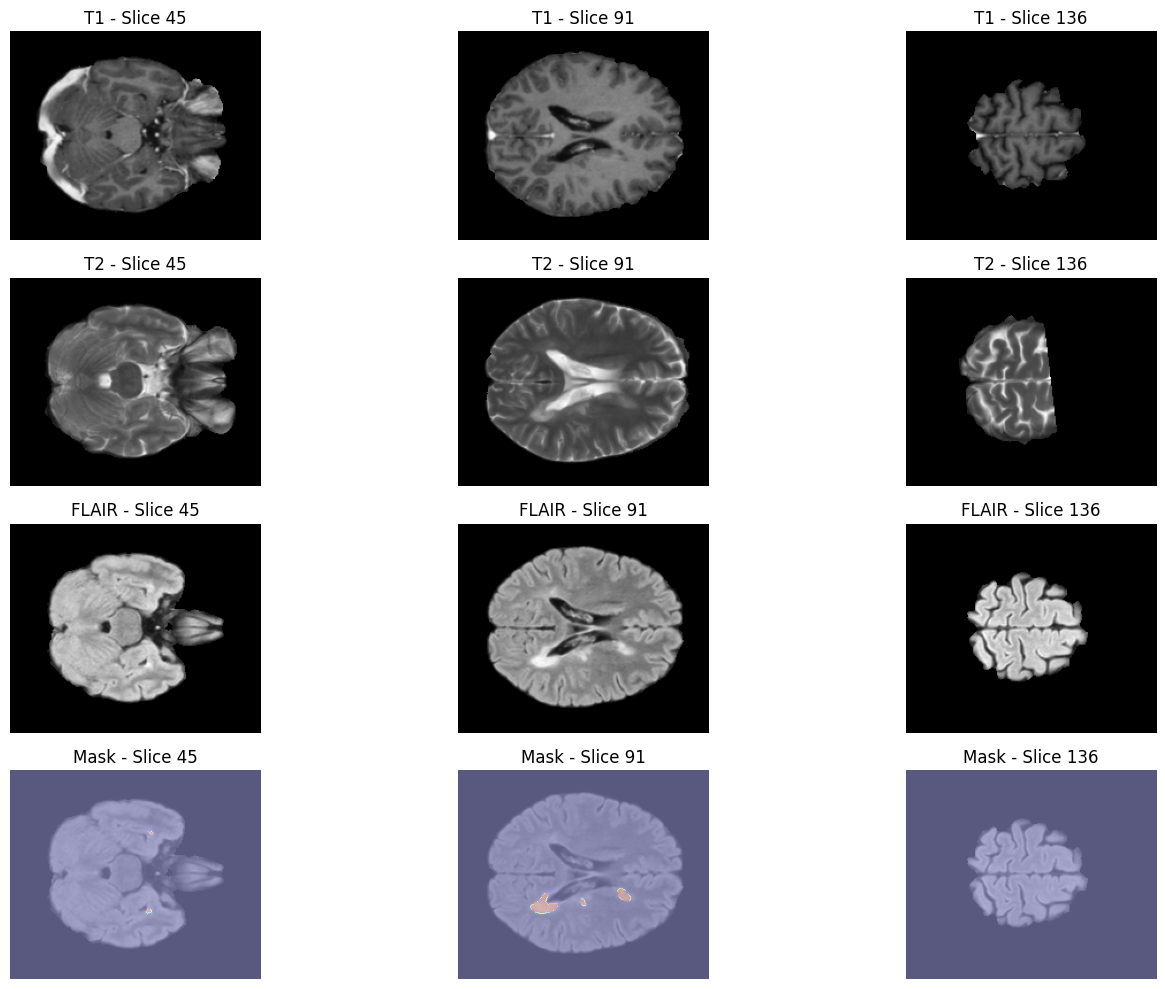

In [17]:
# Show three slices, for each image mode, on Z-Axis
def plot_slices(t1_data, t2_data, flair_data, mask_data):
    """Plot a few slices from the MRI volumes (T1, T2, FLAIR) and their MASKs."""
    slices = [t1_data.shape[2] // 4, t1_data.shape[2] // 2, 3 * t1_data.shape[2] // 4]
    
    fig, axes = plt.subplots(4, len(slices), figsize=(15, 10))
    
    # Loop through each slice index
    for i, slice_idx in enumerate(slices):
        # Plot T1
        axes[0, i].imshow(t1_data[:, :, slice_idx], cmap='gray')
        axes[0, i].set_title(f"T1 - Slice {slice_idx}")
        axes[0, i].axis("off")
        
        # Plot T2
        axes[1, i].imshow(t2_data[:, :, slice_idx], cmap='gray')
        axes[1, i].set_title(f"T2 - Slice {slice_idx}")
        axes[1, i].axis("off")
        
        # Plot FLAIR
        axes[2, i].imshow(flair_data[:, :, slice_idx], cmap='gray')
        axes[2, i].set_title(f"FLAIR - Slice {slice_idx}")
        axes[2, i].axis("off")
        
        # Plot Mask (overlaid on one modality, typically FLAIR or T2)
        axes[3, i].imshow(flair_data[:, :, slice_idx], cmap='gray', alpha=0.5)
        axes[3, i].imshow(mask_data[:, :, slice_idx], cmap='jet', alpha=0.3)  # Mask overlay in a different colormap
        axes[3, i].set_title(f"Mask - Slice {slice_idx}")
        axes[3, i].axis("off")

    plt.tight_layout()
    plt.show()

# Paths to the NIfTI files for T1, T2, FLAIR, and MASK
t1_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_T1.nii"
t2_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_T2.nii"
flair_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_FLAIR.nii"
mask_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_MASK.nii"

# Load the NIfTI files
t1_img = nib.load(t1_path)
t2_img = nib.load(t2_path)
flair_img = nib.load(flair_path)
mask_img = nib.load(mask_path)

# Extract the image data as NumPy arrays
t1_data = t1_img.get_fdata()
t2_data = t2_img.get_fdata()
flair_data = flair_img.get_fdata()
mask_data = mask_img.get_fdata()

# Plot the slices
plot_slices(t1_data, t2_data, flair_data, mask_data)

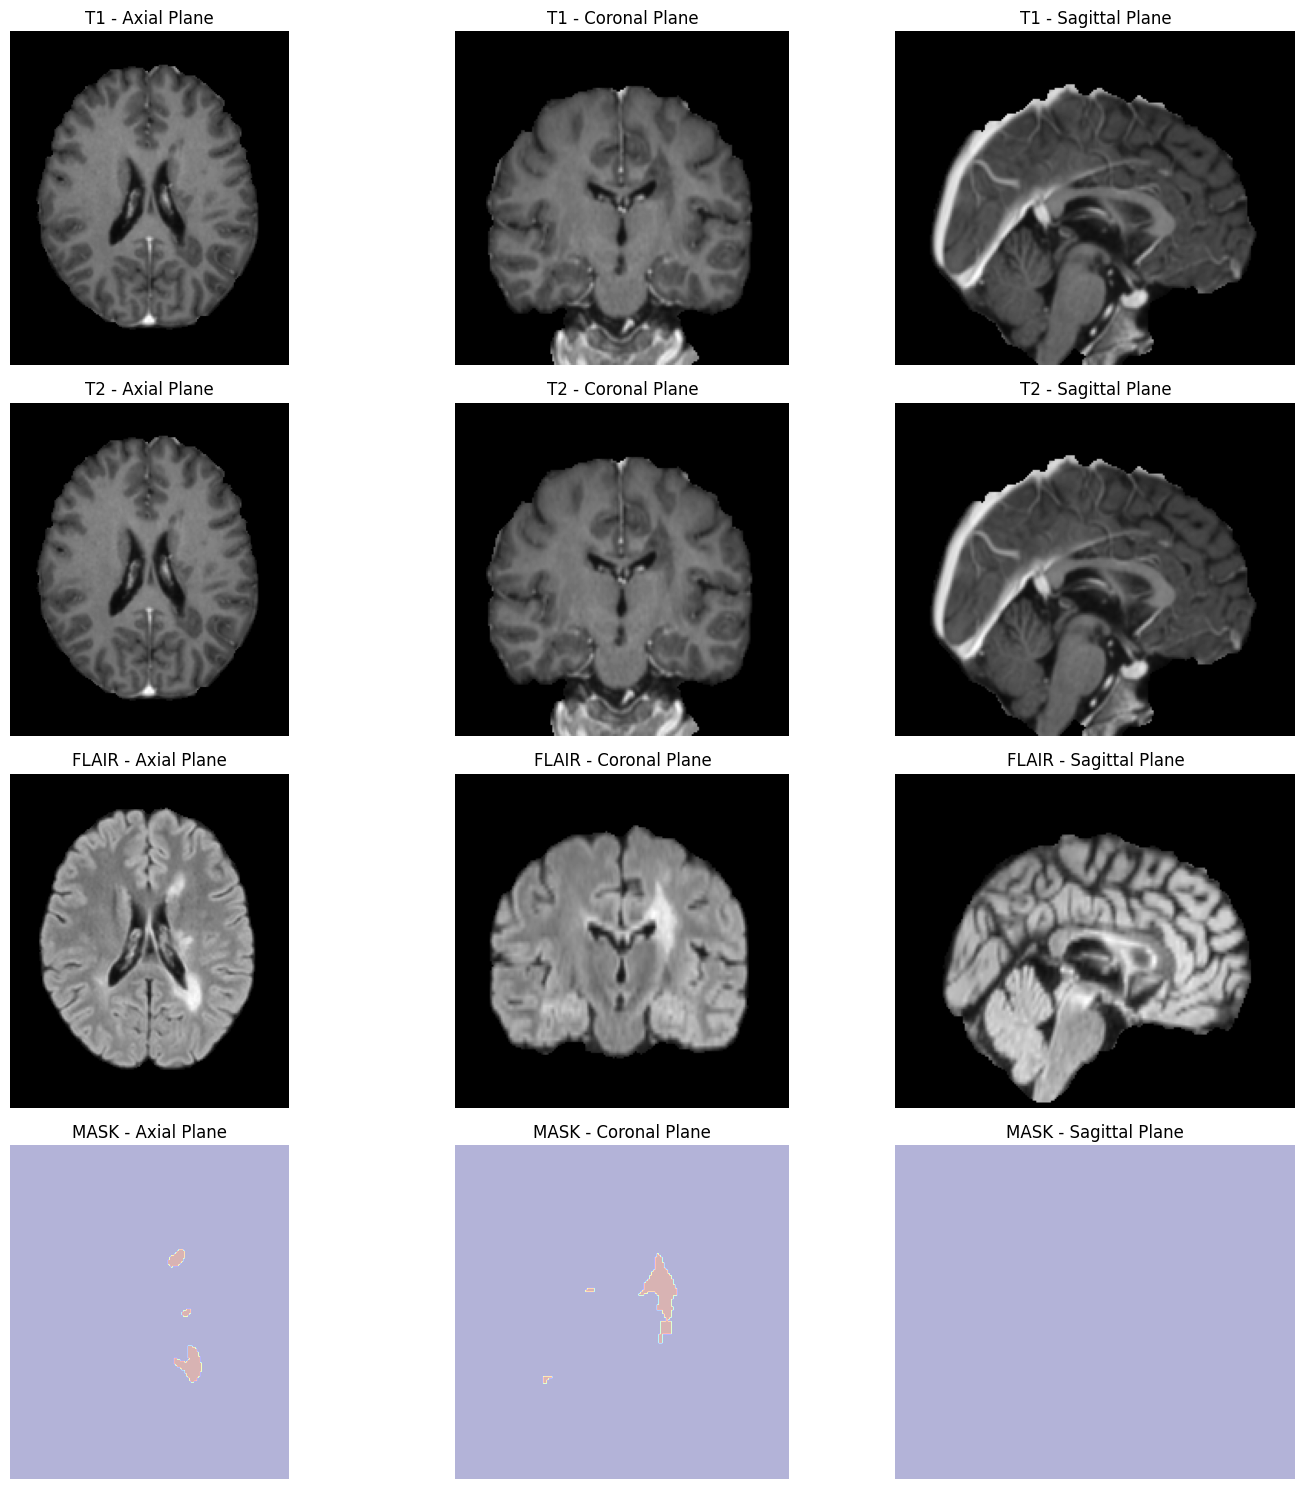

In [18]:
import nibabel as nib
import matplotlib.pyplot as plt

def plot_all_planes(t1_data, t2_data, flair_data, mask_data):
    """Plot T1, T2, FLAIR, and MASK for Axial, Coronal, and Sagittal planes."""
    
    # Define slice indices for each axis
    slice_indices = {
        'axial': t1_data.shape[2] // 2,
        'coronal': t1_data.shape[1] // 2,
        'sagittal': t1_data.shape[0] // 2
    }

    fig, axes = plt.subplots(4, 3, figsize=(15, 15))
    planes = ['axial', 'coronal', 'sagittal']
    
    for row, (modality_name, modality_data) in enumerate(zip(
        ['T1', 'T2', 'FLAIR', 'MASK'], [t1_data, t2_data, flair_data, mask_data]
    )):
        for col, plane in enumerate(planes):
            slice_idx = slice_indices[plane]
            
            if plane == 'axial':  # Axial: Slices along z-axis
                image_slice = modality_data[:, :, slice_idx]
            elif plane == 'coronal':  # Coronal: Slices along y-axis
                image_slice = modality_data[:, slice_idx, :]
            else:  # Sagittal: Slices along x-axis
                image_slice = modality_data[slice_idx, :, :]

            # Display the corresponding plot
            cmap = 'gray' if modality_name != 'MASK' else 'jet'
            alpha = 0.3 if modality_name == 'MASK' else 1.0
            axes[row, col].imshow(image_slice.T, cmap=cmap, alpha=alpha, origin='lower')
            axes[row, col].set_title(f"{modality_name} - {plane.capitalize()} Plane")
            axes[row, col].axis("off")

    plt.tight_layout()
    plt.show()

# Paths to the NIfTI files for T1, T2, FLAIR, and MASK
t1_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_T1.nii"
t2_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_T1.nii"
flair_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_FLAIR.nii"
mask_path = "../data/MSLesSeg-Dataset_FINAL/train/P1/T1/P1_T1_MASK.nii"

# Load the NIfTI files
t1_img = nib.load(t1_path)
t2_img = nib.load(t2_path)
flair_img = nib.load(flair_path)
mask_img = nib.load(mask_path)

# Extract the image data as NumPy arrays
t1_data = t1_img.get_fdata()
t2_data = t2_img.get_fdata()
flair_data = flair_img.get_fdata()
mask_data = mask_img.get_fdata()

# Plot the slices for all planes
plot_all_planes(t1_data, t2_data, flair_data, mask_data)


---

# Experiment Schedule

1) Train SegFormer3D on BraTs 2021
2) Train SegFormer3D on MSLesSeg
3) Fine-Tune SegFormer3D (pre-trained on BraTs 2021) on MSLesSeg
4) Mixture of Experts Architecture

---